<a href="https://colab.research.google.com/github/arezoosh/PhD-Course1/blob/master/unsupervised_supervised_Portfolio_Tuesday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Tuesday

We will be using the turnover dataset 

https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv'

for this portfolio to do 3 things:

## Unsupervised ML

- Prepare the dataset (select the columns that are useful)
- Preprocess (Scale)
- Reduce dimensionality and perhaps make a scatterplot of the data
- Examine the reduced data

## Supervised ML

- Preprocess the data
- Try to predict "churn" using a simple model (Logistic Regression)
- Try a more advanced model (e.g. Random Forest)
- Evaluate your model
- Predict "satisfaction" (!!! This is a regression model)
- Evaluate the regression model



In [0]:
Your turn
In the repo, you will find a dataset describing employee turnover in a company.

https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv

The dataset contains data collected in an employee survey and enriched with HR data.

The variable churn tells us if the employee left the company in the past 3 months. The other variables are collected

Classification
Try to predict churn using a classification pipeline (perhaps add some simple exploration of the data first)

Regression
Try to predict the number of weekly average hours worked.

**Before working with the data, you should use pd.get_dummies to get dummies for categorical variables

In [0]:
import pandas as pd

In [0]:
turnover = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')

In [0]:
turnover.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [0]:
turnover.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

In [0]:

!pip uninstall -qq matplotlib
!pip install -qq -U matplotlib

Proceed (y/n)? y
     |████████████████████████████████| 13.1MB 179kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
import pandas as pd
import seaborn as sns
import altair as alt

In [0]:
sns.set(rc={'figure.figsize':(10,10)})

In [0]:
data = turnover[['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion']]
       data

In [0]:
categoric_data = turnover[['department','salary','churn']]
categoric_data

,department,salary,churn
0,sales,low,1
1,sales,medium,1
2,sales,medium,1
3,sales,low,1
4,sales,low,1
...,...,...,...
14994,support,low,1
14995,support,low,1
14996,support,low,1
14997,support,low,1


In [0]:
salary_dummy = pd.get_dummies(categoric_data.salary, columns=['salary'])
salary_dummy
dept_dummy = pd.get_dummies(categoric_data.department, columns=['department'])
dept_dummy
churn_dummy = pd.get_dummies(categoric_data.churn, columns=['churn'])
churn_dummy

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
14994,0,1
14995,0,1
14996,0,1
14997,0,1


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaledraprint(t)t+=1
  dept_mapper nge(1,dept_len)
  d
  ept_mapper = {
t=0i:t}rtment
  .unique():nt(i)for i in categoric_data
(den.high)

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.34123516,
        -0.41116529, -0.14741182],
       [ 0.75281433,  0.84070693,  0.97111292, ...,  1.71343614,
        -0.41116529, -0.14741182],
       [-2.02247906,  0.95755433,  2.59376348, ...,  0.34365527,
        -0.41116529, -0.14741182],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.34123516,
        -0.41116529, -0.14741182],
       [-2.02247906,  1.42494396,  1.7824382 , ...,  0.34365527,
        -0.41116529, -0.14741182],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.34123516,
        -0.41116529, -0.14741182]])

In [0]:
from sklearn.decomposition import PCA
import numpy as np

model = PCA()
model.fit(data_scaled)
data_reduced = model.transform(data_scaled)

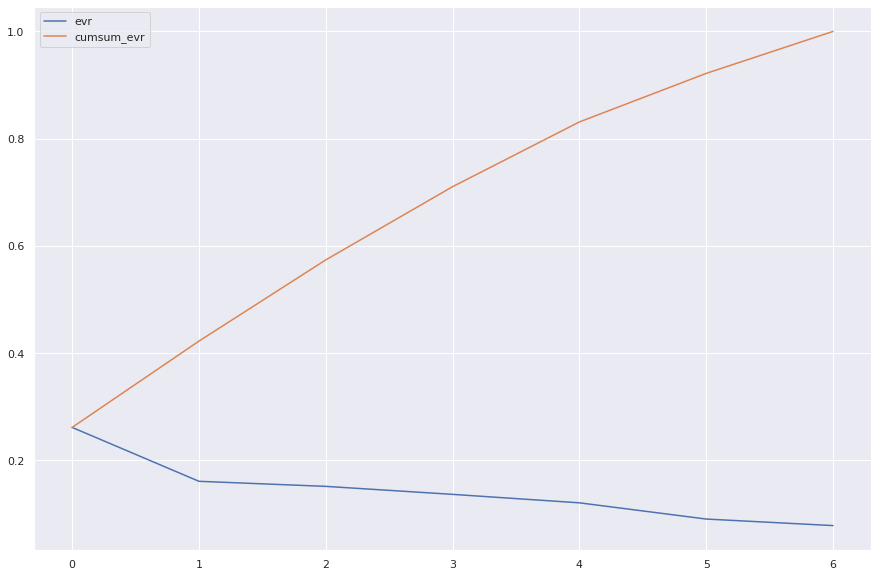

In [0]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

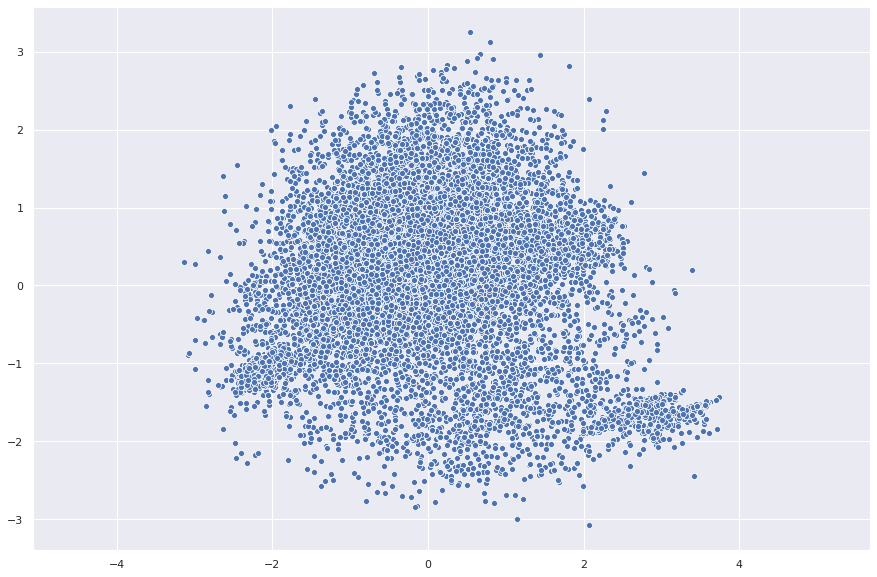

In [0]:
# Scatter plot of the first 2 componentws
import matplotlib.pyplot as plt
sns.scatterplot(x = data_reduced[:,0], y = data_reduced[:,1])
plt.axis('equal')
plt.show()

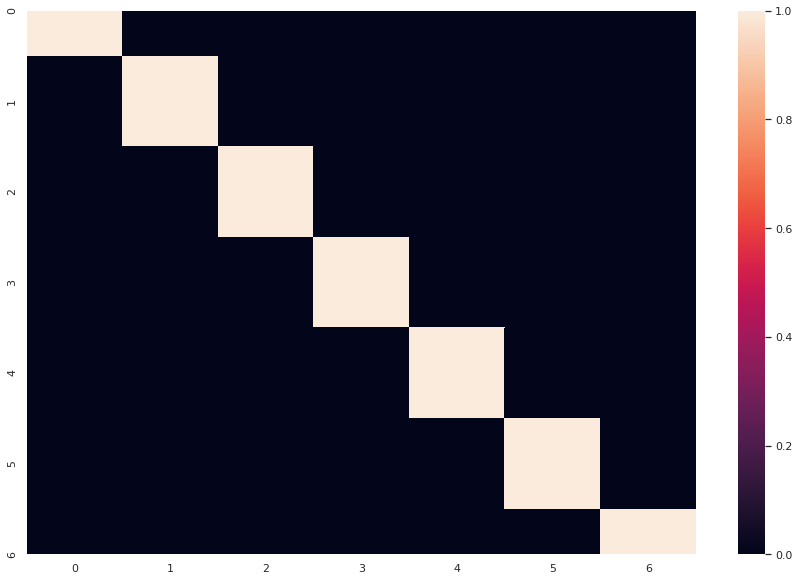

In [0]:
sns.heatmap(pd.DataFrame(data_reduced).corr())

In [0]:
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]

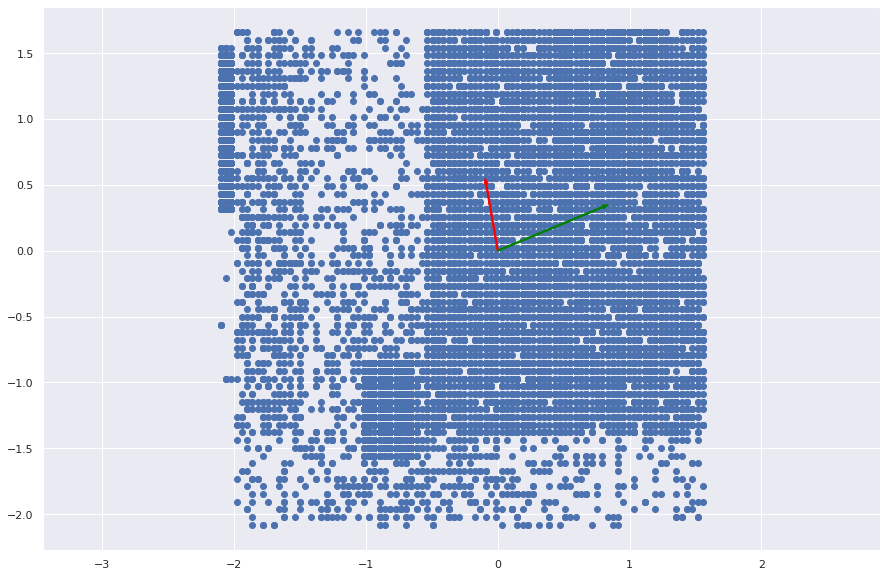

In [0]:
plt.scatter(data_scaled[:,0], data_scaled[:,1])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

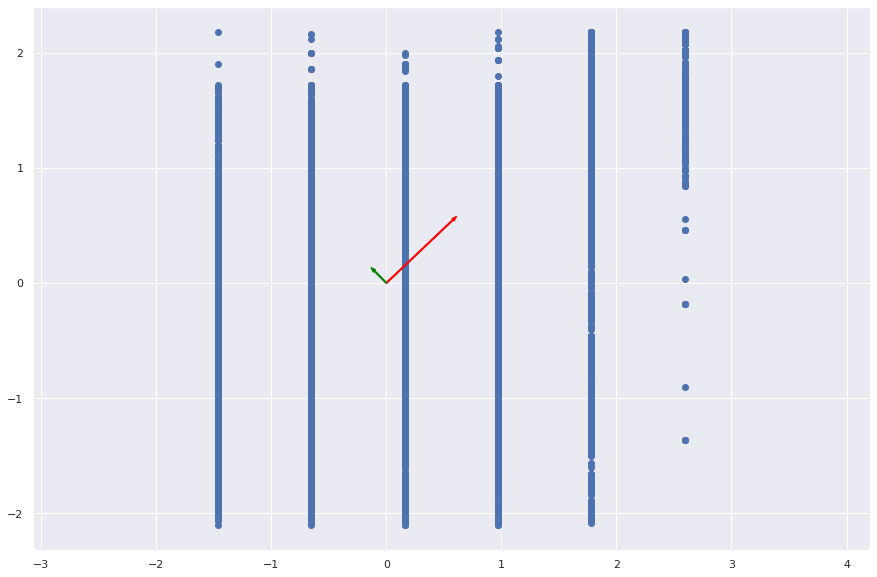

In [0]:
plt.scatter(data_scaled[:,2], data_scaled[:,3])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[2], first_pc[3], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[2], second_pc[3], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [0]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

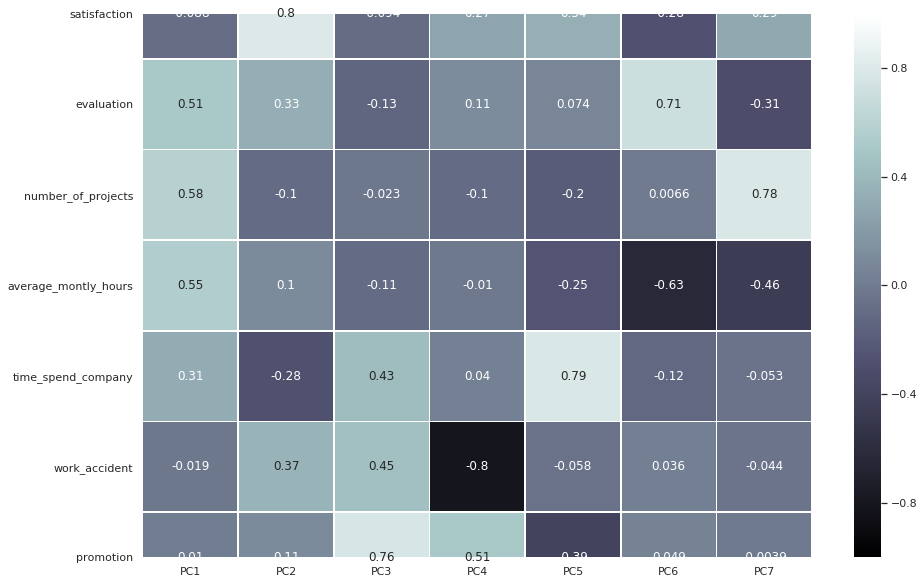

In [0]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

In [0]:
X_reduced.shape

(14999, 4)

In [0]:
import numpy as np

plot_data = pd.DataFrame({'evr': pca.explained_variance_ratio_, 'cumsum_evr': np.cumsum(pca.explained_variance_ratio_)}).stack()

In [0]:
plot_data

0  evr           0.277385
   cumsum_evr    0.277385
1  evr           0.250279
   cumsum_evr    0.527664
2  evr           0.248038
   cumsum_evr    0.775702
3  evr           0.224298
   cumsum_evr    1.000000
dtype: float64

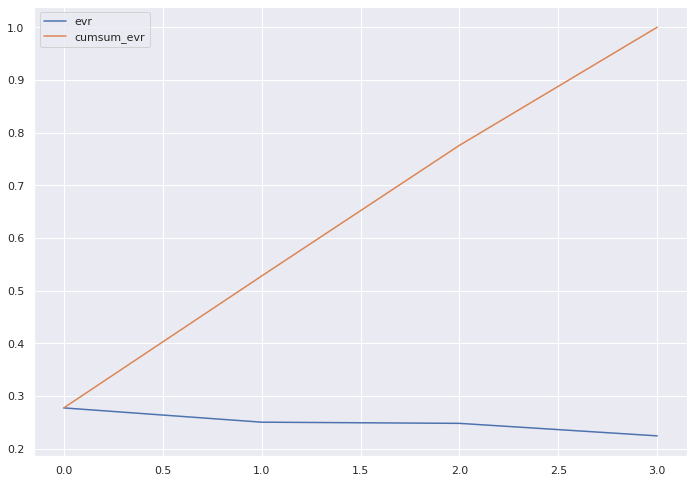

In [0]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [0]:
pca.explained_variance_ratio_.sum()

0.9999999999999999